<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment



# 🌱 **기본 과제**

## **Part 1. Eigenstuff**

- 벡터 $[2, 1]$이 $T$에 의해 변환된 벡터는 무엇인지 구하세요.
- 벡터 $[-1, 2]$가 $T$에 의해 변환된 벡터는 무엇인지 구하세요.
- numpy를 사용하여 $T$에 대한 eigenvalue와 eigenvector를 구하세요. 
> $T = \begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix}$

##### **Q1. 벡터 $[2, 1]$이 $T$에 의해 변환된 벡터를 스칼라곱 형태로 나타내었을 때, 스칼라 값과 벡터를 ($1, [2,3]$) 형태로 쓰세요.**

In [ ]:
import numpy as np

mat_T = np.array(np.mat('9 4; 4 3'))
mat_T

array([[9, 4],
       [4, 3]])

In [ ]:
def eigenstuff(vector):
  print("transformed vector: ", vector)
  eigenvalue = np.gcd(vector[0], vector[1]) # eigenvalue: np.gcd()는 괄호안에 인자로 들어온 숫자들의 최대공약수를 반환
  eigenvector = vector/eigenvalue # eigenvector: 변환된 벡터를 eigenvalue로 divide
  
  print("eigenvalue, eigenvector: ")
  return eigenvalue, list(map(int,eigenvector)) # list 전체 성분 int로 변경

In [ ]:
eigenstuff(np.matmul(mat_T, np.array([2,1])))

transformed vector:  [22 11]
eigenvalue, eigenvector: 


(11, [2, 1])

##### **Q2. 벡터 $[-1, 2]$가 $T$에 의해 변환된 벡터를 스칼라곱 형태로 나타내었을 때, 스칼라 값과 벡터를 ($1, [2, 3]$) 형태로 쓰세요.**

In [ ]:
eigenstuff(np.matmul(mat_T, np.array([-1, 2])))

transformed vector:  [-1  2]
eigenvalue, eigenvector: 


(1, [-1, 2])

##### **Q3. numpy를 사용하여 구한 $T$의 eigenvalue에 따른 eigenvector를 ($1, [2, 3]$) 형태로 모두 쓰세요. (단, eigenvector의 각 성분은 반올림하여 소수점 둘째 자리까지 구하세요.)**

In [ ]:
value, vector = np.linalg.eig(mat_T)
value, vector

(array([11.,  1.]), array([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

In [ ]:
print(f'({int(value[0])}, {np.around(vector[:, 0], 2)})')
print(f'({int(value[1])}, {np.around(vector[:, 1], 2)})')

(11, [0.89 0.45])
(1, [-0.45  0.89])


## **Part 2. PCA**

### **2-1. 데이터셋 준비하기**

- 다음 링크를 참조하여 `penguins` 데이터셋을 불러오세요. <br>
  <http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>
- 5개의 feature `species`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`만 추출하여 데이터프레임 형태로 저장하세요. 
  - 데이터프레임의 이름은 `features`로 합니다. 
- `features` 데이터프레임의 결측치가 있는 row를 출력하여 확인 후 제거하세요. 
  - 결측치 제거 후 데이터프레임의 인덱스를 초기화합니다.
- `species` column은 변수 `species`에 따로 분리하여 저장하세요.
  - `features`에서는 `species` column을 제거합니다. 

##### **Q4. 결측치가 포함된 row는 모두 몇 개인지 쓰세요.**

In [ ]:
# 데이터셋 불러오기 

import seaborn as sns

df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# 결측치 먼저 제거 후 features, species 분리
df1 = df.copy()

# 사용할 column에 있는 결측치만 제거
null_index = df1[df1['bill_length_mm'].isnull()|df1['bill_depth_mm'].isnull()|df1['flipper_length_mm'].isnull()|df1['body_mass_g'].isnull()].index
df1.drop(labels=null_index, inplace=True)

df1 = df1.reset_index(drop=True)

features1 = df1.loc[:, 'bill_length_mm':'body_mass_g']
species1 = df1['species']

In [ ]:
# option2) features, species 먼저 분리 후, 결측치 제거

#필요한 column 추출
features = df.loc[:,'bill_length_mm':'body_mass_g']
species = df['species']

In [ ]:
# 결측치 확인

features.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [ ]:
# 결측치 출력 

features_nan = features[features['bill_length_mm'].isnull()|features['bill_depth_mm'].isnull()|features['flipper_length_mm'].isnull()|features['body_mass_g'].isnull()]
features_nan

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [ ]:
features_nan.shape[0]

2

In [ ]:
# features 결측치 제거

features = features.dropna().reset_index(drop=True)
features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


In [ ]:
# species에서 결측치 index에 해당하는 값 제거
species.drop(features_nan.index, inplace=True)

species.reset_index(drop=True, inplace=True)

species

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
337    Gentoo
338    Gentoo
339    Gentoo
340    Gentoo
341    Gentoo
Name: species, Length: 342, dtype: object

### **2-2. PCA**

- 먼저 데이터를 표준화 하세요. 
  - sklearn에서 제공하는 `StandardScaler` 라이브러리로 표준화를 수행해보세요.
- 표준화한 데이터에 대하여 PCA를 시행하세요. 
  - PC(주성분)는 2개로 합니다. 
- 두 PC에 대하여 scatter plot을 그리세요. 
  - x축에는 첫 번째 주성분을, y축에는 두 번째 주성분을 기준으로 시각화하세요.
  - seaborn 라이브러리의 `.scatterplot()`에서 `hue` 파라미터를 `species`로 설정해 보세요. 
- 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

In [ ]:
# 데이터 표준화 

import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [ ]:
features.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532


In [ ]:
# PCA 

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
extracted_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])
extracted_df.head()

,PC1,PC2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210


##### **Q5. scatter plot에서 가장 오른쪽에 위치한 펭귄의 species는 무엇인지 쓰세요.**



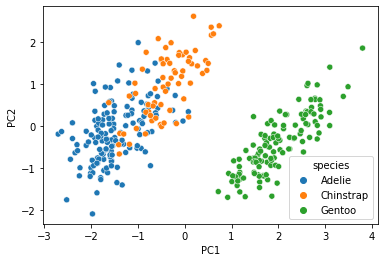

In [ ]:
# scatter plot

sns.scatterplot(data=extracted_df, x='PC1', y='PC2', hue=species);

In [ ]:
'Gentoo'

'Gentoo'

##### **Q6. 2개의 PC를 이용하여 설명되는 variance의 ratio의 합은 몇 %인지 고르세요.**
- 60% 미만
- 60% 이상 70% 미만
- 70% 이상 80% 미만
- 80% 이상 

In [ ]:
# explained variance ratio

ratio = pca.explained_variance_ratio_
ratio

array([0.68843878, 0.19312919])

In [ ]:
ratio.sum()*100

88.15679694372629

# 🥇 **도전 과제** 

## **Part 3. Scree Plot**
> **Part 2**에서 표준화한 데이터셋을 계속 사용합니다. 

- **PCA의 PC를 4개로 하여 "Scree Plot"을 만들어 보세요.** 
  - 몇 개의 PC를 사용하는 게 가장 적절한지 논리적으로 설명해 보세요. 
  - 90%의 내용을 설명하기 위해서는 몇 개의 PC를 사용해야 하는지 쓰세요.


In [ ]:
pca_all = PCA(4)
z = pca_all.fit_transform(features)

In [ ]:
ratio_all = pca_all.explained_variance_ratio_
ratio_all

array([0.68843878, 0.19312919, 0.09130898, 0.02712305])

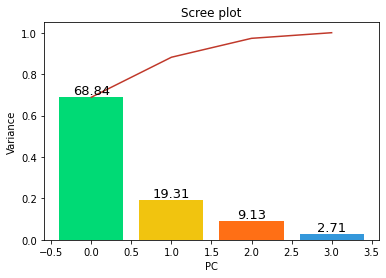

In [ ]:
import matplotlib.pyplot as plt

def scree_plot(pca):
    num_components = len(ratio_all)
    ind = np.arange(num_components)
    
    ax = plt.subplot()
    cumvals = np.cumsum(ratio_all)
    ax.bar(ind, ratio_all, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(np.around(ratio_all[i]*100,2)))), (ind[i], ratio_all[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca_all)